# DATA EXPLORATION
# FINDING TARGET CUSTOMERS AND MARKETING ANALYSIS


In [80]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    230367 non-null  object 
 1   Timestamp               230345 non-null  object 
 2   Account No              230372 non-null  float64
 3   Balance                 230350 non-null  float64
 4   Amount                  230387 non-null  float64
 5   Third Party Account No  6832 non-null    float64
 6   Third Party Name        223517 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.3+ MB


In [82]:
data.shape 

(230596, 7)

In [83]:
data.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [84]:
data.dtypes

Date                       object
Timestamp                  object
Account No                float64
Balance                   float64
Amount                    float64
Third Party Account No    float64
Third Party Name           object
dtype: object

In [85]:
data.describe()

,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


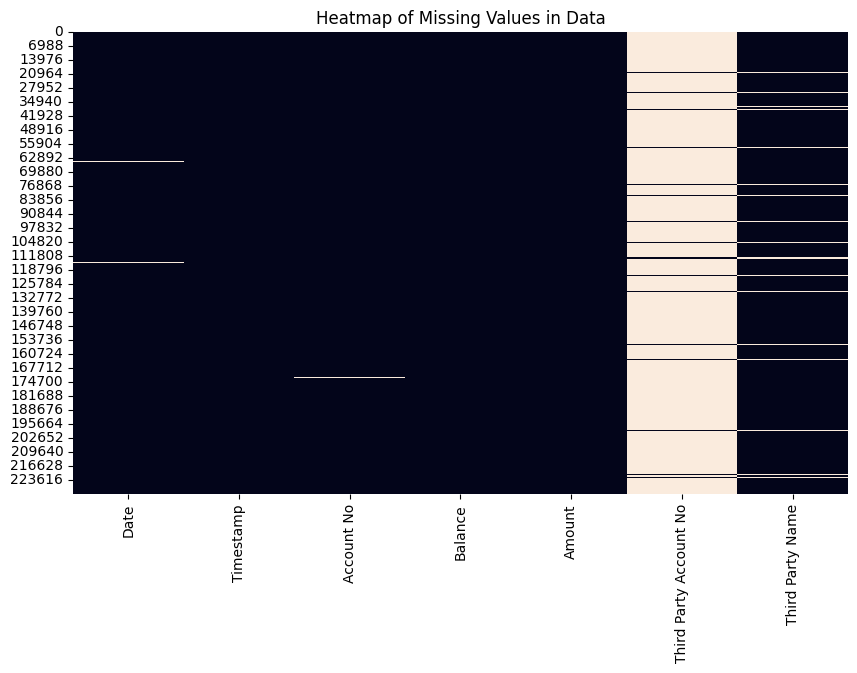

In [86]:
# Visualize missing values as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in Data')
plt.show()

### This map is not giving clear missing values, as we have a large dataset, lets proceed normally

In [87]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [88]:
# Calculate the percentage of null values for each column
data.isnull().mean() * 100

Date                       0.099308
Timestamp                  0.108848
Account No                 0.097140
Balance                    0.106680
Amount                     0.090635
Third Party Account No    97.037243
Third Party Name           3.069871
dtype: float64

### i want to to check the number of transactions of other users, to get more details

In [89]:
# 'Account No' and number of transactions for each account
transactions_per_user = data.groupby('Account No').size()

transactions_count = transactions_per_user.reset_index(name='Number of Transactions')
transactions_count.head()

,Account No,Number of Transactions
0,101531259.0,123
1,104832000.0,164
2,105375973.0,158
3,106601471.0,193
4,108481285.0,368


In [90]:
# finding average number of transactions of all users
#avg_transaction_per_user = 
transactions_per_user.mean()
#avg_transaction_per_user

236.03688524590163

### we have 224 missing values in account number, i think we can create a random account number

In [91]:
# Generating unique account number to remove null values
existing_acc_numbers = pd.to_numeric(data['Account No'], errors='coerce').dropna().unique()
new_acc_number = int(max(existing_acc_numbers) + 1)

# Replace null values in the "Account No" column with the new account number
data['Account No'].fillna(new_acc_number, inplace=True)

# Verifyong that there are no null values in the "Account No" column
verification_result = data['Account No'].isnull().sum()

new_acc_number, verification_result

(999752673, 0)

In [92]:
print(data[(data['Account No'] == 999752673)  ]) ### checking the data of newly generated account

              Date Timestamp   Account No       Balance   Amount  \
527     01/01/2023     00:00  999752673.0    813.000000 -1143.00   
1295    01/01/2023     00:00  999752673.0   2284.030000   -18.99   
1335    01/01/2023     00:00  999752673.0   1542.030000   -18.99   
1563    01/01/2023     00:00  999752673.0   3351.010000   -15.99   
1703    01/01/2023     00:00  999752673.0   3785.780000   -18.99   
...            ...       ...          ...           ...      ...   
223332  30/11/2023     23:59  999752673.0  -1043.893200    -7.99   
223657  30/11/2023     23:59  999752673.0  11517.049529   -15.99   
226353  30/11/2023     23:59  999752673.0  -1692.102105   -15.99   
229119  04/12/2023     10:03  999752673.0   2619.340104  -225.37   
230360  06/12/2023     11:34  999752673.0     30.958899  -111.36   

        Third Party Account No Third Party Name  
527                        NaN          Halifax  
1295                       NaN          PureGym  
1335                       NaN   

## what is done till now:
- data exploration, using functions like shape(),info(),isnull().sum(),describe(), dtypes().
- imputing null values in account number: by the taking the the average transaction count (taking mean),which is 236, and our missing values count is 224. So, I decided to generate a new account number instead of removing them.


In [93]:
## float to integer
data['Account No'] = data['Account No'].astype(int)

In [94]:
# Convert 'Third Party Account No' to nullable integer type
data['Third Party Account No'] = data['Third Party Account No'].astype('Int64')

In [95]:
# Create a new 'Third Party' column
data['Third Party'] = data['Third Party Name'].combine_first(data['Third Party Account No'])

In [96]:
# Drop the original 'Third Party Account No' and 'Third Party Name' columns
data.drop(columns=['Third Party Account No', 'Third Party Name'], inplace=True)

In [97]:
data.nunique()

Date              340
Timestamp        1401
Account No        977
Balance        229888
Amount          17314
Third Party       756
dtype: int64

In [98]:
data.isnull().sum()

Date           229
Timestamp      251
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

In [99]:
data['Account No'].nunique() ## total no.of users

977

In [100]:
## find unique and similarities

## filling missing values in date and timestamp :
##### 1. Date and Timestamp
- Method Used: Forward Fill
- Why?
- Both the Date and Timestamp fields are critical for maintaining the sequence and continuity in time   series data.
- Forward fill is appropriate here because it assumes that the missing date or timestamp can reasonably be replaced by the last known value, which is a common practice in time-sensitive data to maintain alignment in time series analysis.
- This method helps avoid introducing artificial discontinuities in the time sequence, which could occur if we interpolated times or used backward fill.

In [101]:
# Fill missing Date and Timestamp
data['Date'] = data['Date'].fillna(method='ffill')
data['Timestamp'] = data['Timestamp'].fillna(method='ffill')

In [102]:
# Convert  column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [103]:
data.isnull().sum()

Date             0
Timestamp        0
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

### simple calculations:
Third Party Account No  -  223764

Third Party Name         -   7079

total = 223764 +7079=230843

shape of data, 230596

230843-230596 =247 
- may be can delete them

In [104]:
# Dropping the rows with null values in the 'Third Party' column
data.dropna(subset=['Third Party'], inplace=True)
print(data.isnull().sum())

Date             0
Timestamp        0
Account No       0
Balance        246
Amount         208
Third Party      0
dtype: int64


In [105]:
data

,Date,Timestamp,Account No,Balance,Amount,Third Party
0,2023-01-01,00:00,678330503,2971.000000,1584.00,Westport Care Home
1,2023-01-01,00:00,472213568,3792.000000,1950.00,Barbiee Boutique
2,2023-01-01,00:00,472213568,3012.000000,-780.00,283027736
3,2023-01-01,00:00,283027736,1787.000000,780.00,472213568
4,2023-01-01,00:00,624500124,3226.000000,1825.00,Fat Face
...,...,...,...,...,...,...
230591,2023-12-06,20:54,581655972,45935.206861,-41.06,Tesco
230592,2023-12-06,20:55,786141370,-244.837500,-62.35,Sainsbury Local
230593,2023-12-06,21:05,824916823,9709.172159,-32.94,Deliveroo
230594,2023-12-06,21:13,366550080,26834.165794,-19.25,Amazon


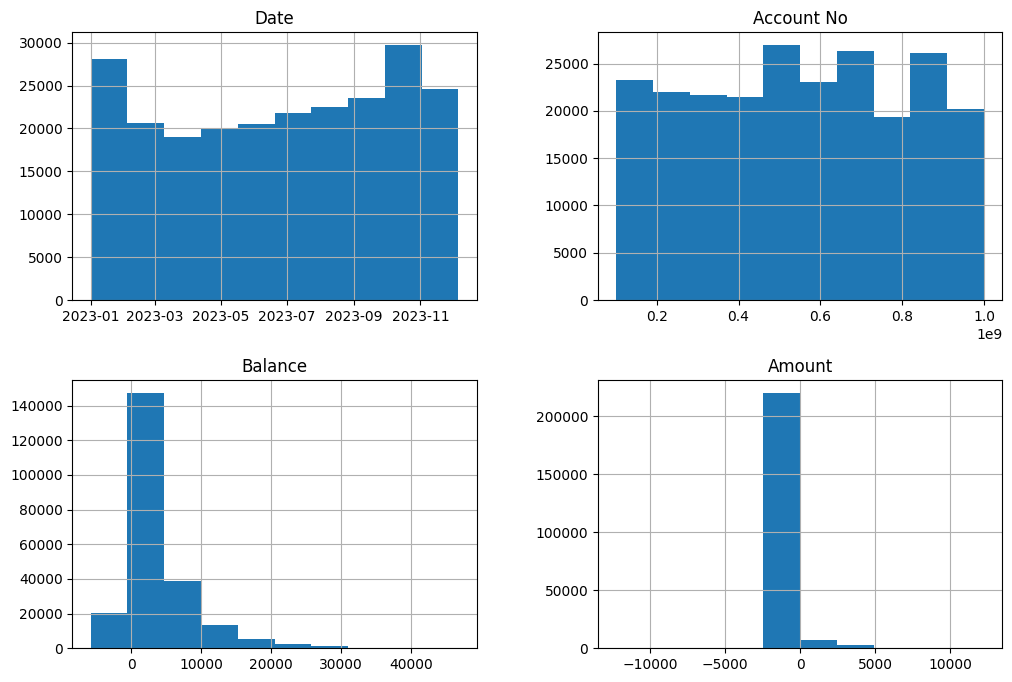

In [106]:
data.hist( figsize = (12,8) )
plt.show() ## to see the distributions of data

### i want to impute the missing values in amount and balance column  as well, but I have observed some abnormalities in account transactions

## how to impute amount and balance column 

## analyze the relationship between transaction direction (debit/credit) and balance:
1. Segment the Data
2. Statistical Summary
3. Visual Analysis

In [107]:
# Identify debits and credits
debits = data[data['Amount'] < 0]
credits = data[data['Amount'] > 0]

In [108]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

print("Debit Statistics:\n", debit_stats)
print("\nCredit Statistics:\n", credit_stats)

Debit Statistics:
 count    219484.000000
mean       3614.055463
std        5413.180527
min       -5790.983500
25%         353.977270
50%        1655.809208
75%        5270.782486
max       46184.158837
Name: Balance, dtype: float64

Credit Statistics:
 count    10402.000000
mean      3505.657746
std       4583.327041
min      -4678.910000
25%        869.737557
50%       2137.703000
75%       4362.459068
max      46804.158837
Name: Balance, dtype: float64


In [109]:
# Interpolate missing values for Balance and Amount
data['Balance'] = data['Balance'].interpolate(method='linear')
data['Amount'] = data['Amount'].interpolate(method='linear')

In [110]:
# Impute missing values in Balance and Amount columns using forward fill
#data['Balance'] = data['Balance'].fillna(method='ffill')
#data['Amount'] = data['Amount'].fillna(method='ffill')


## Validation:

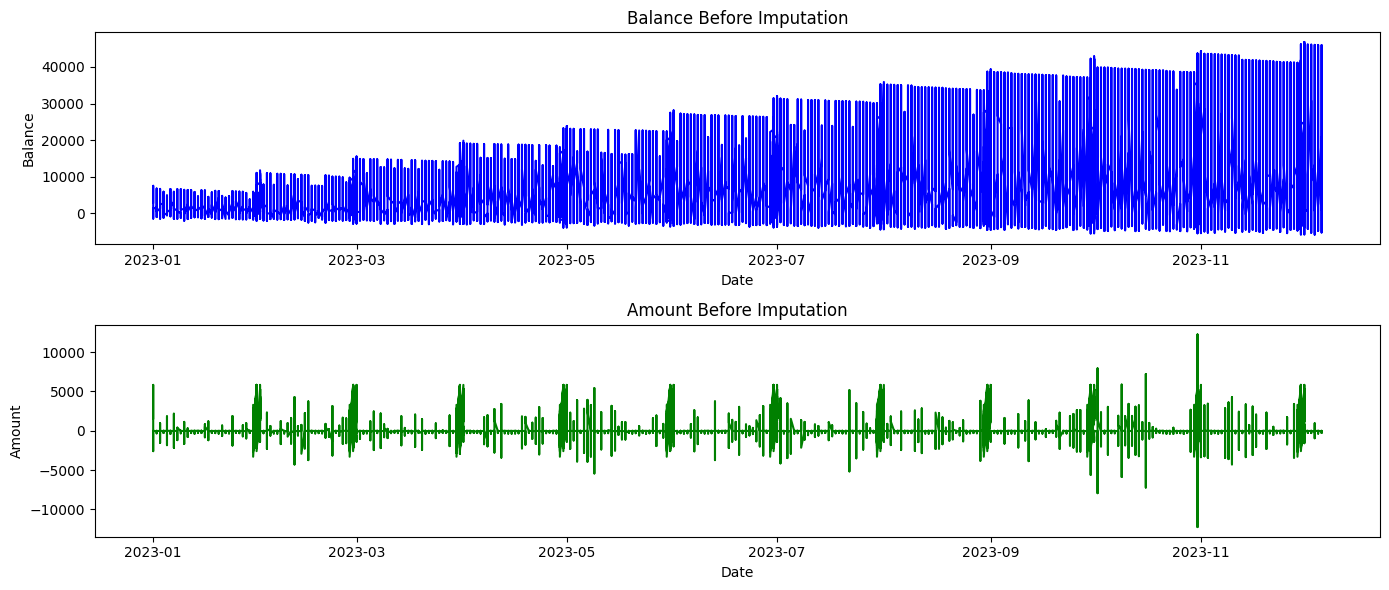

In [111]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Balance'], color='blue')
plt.title('Balance Before Imputation')
plt.xlabel('Date')
plt.ylabel('Balance')

plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Amount'], color='green')
plt.title('Amount Before Imputation')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

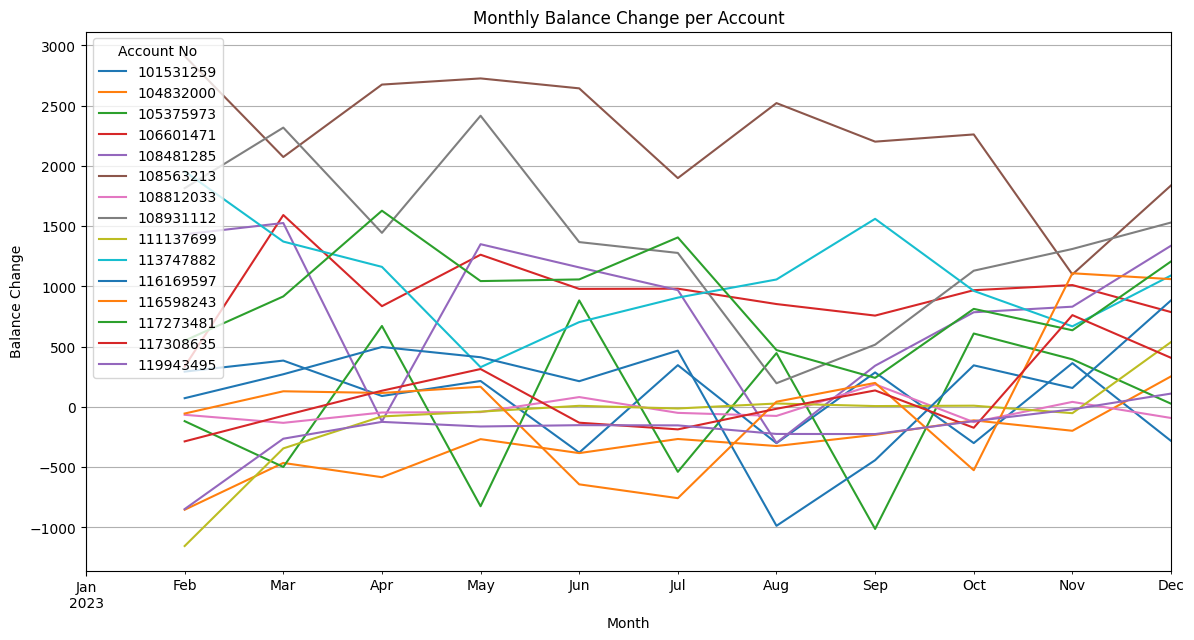

Account No  Date      
101531259   2023-01-31            NaN
            2023-02-28     292.656333
            2023-03-31     384.231356
            2023-04-30      90.260100
            2023-05-31     214.820353
                             ...     
999752673   2023-08-31     402.703448
            2023-09-30    4637.218695
            2023-10-31   -2393.442972
            2023-11-30    -943.604161
            2023-12-31   -5114.551556
Name: Balance, Length: 11625, dtype: float64


In [112]:

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate the average monthly balance for each account
monthly_balance_per_account = data.groupby('Account No')['Balance'].resample('M').mean()

# Calculate the month-over-month change for each account
monthly_balance_change_per_account = monthly_balance_per_account.groupby(level=0).diff()

# Optionally, you can unstack for easier visualization or further analysis
monthly_balance_change_unstacked = monthly_balance_change_per_account.unstack(level=0)

# Plotting the results for a few accounts to visualize the trends
fig, ax = plt.subplots(figsize=(14, 7))
sample_accounts = monthly_balance_change_unstacked.columns[:15]  ## account number
monthly_balance_change_unstacked[sample_accounts].plot(ax=ax)
ax.set_title('Monthly Balance Change per Account')
ax.set_ylabel('Balance Change')
ax.set_xlabel('Month')
plt.legend(title='Account No')
plt.grid(True)
plt.show()

# Show the data for inspection
print(monthly_balance_change_per_account)

In [115]:
data

,Date,Timestamp,Account No,Balance,Amount,Third Party
0,2023-01-01,00:00,678330503,2971.000000,1584.00,Westport Care Home
1,2023-01-01,00:00,472213568,3792.000000,1950.00,Barbiee Boutique
2,2023-01-01,00:00,472213568,3012.000000,-780.00,283027736
3,2023-01-01,00:00,283027736,1787.000000,780.00,472213568
4,2023-01-01,00:00,624500124,3226.000000,1825.00,Fat Face
...,...,...,...,...,...,...
230344,2023-12-06,20:54,581655972,45935.206861,-41.06,Tesco
230345,2023-12-06,20:55,786141370,-244.837500,-62.35,Sainsbury Local
230346,2023-12-06,21:05,824916823,9709.172159,-32.94,Deliveroo
230347,2023-12-06,21:13,366550080,26834.165794,-19.25,Amazon


In [114]:
print(data.reset_index())
data.reset_index(inplace=True)

             Date Timestamp  Account No       Balance   Amount  \
0      2023-01-01     00:00   678330503   2971.000000  1584.00   
1      2023-01-01     00:00   472213568   3792.000000  1950.00   
2      2023-01-01     00:00   472213568   3012.000000  -780.00   
3      2023-01-01     00:00   283027736   1787.000000   780.00   
4      2023-01-01     00:00   624500124   3226.000000  1825.00   
...           ...       ...         ...           ...      ...   
230344 2023-12-06     20:54   581655972  45935.206861   -41.06   
230345 2023-12-06     20:55   786141370   -244.837500   -62.35   
230346 2023-12-06     21:05   824916823   9709.172159   -32.94   
230347 2023-12-06     21:13   366550080  26834.165794   -19.25   
230348 2023-12-06     21:32   259015404   1145.349837   -37.64   

               Third Party  
0       Westport Care Home  
1         Barbiee Boutique  
2                283027736  
3                472213568  
4                 Fat Face  
...                    ...  
2303

In [116]:
# Summary statistics before imputation
balance_stats_before = data['Balance'].describe()
amount_stats_before = data['Amount'].describe()

# Summary statistics after imputation
balance_stats_after = data['Balance'].describe()
amount_stats_after = data['Amount'].describe()

print("Balance Summary Statistics Before Imputation:\n", balance_stats_before)
print("\nBalance Summary Statistics After Imputation:\n", balance_stats_after)
print("\nAmount Summary Statistics Before Imputation:\n", amount_stats_before)
print("\nAmount Summary Statistics After Imputation:\n", amount_stats_after)

Balance Summary Statistics Before Imputation:
 count    230349.000000
mean       3609.615716
std        5378.046590
min       -5790.983500
25%         374.023062
50%        1687.073240
75%        5216.080871
max       46804.158837
Name: Balance, dtype: float64

Balance Summary Statistics After Imputation:
 count    230349.000000
mean       3609.615716
std        5378.046590
min       -5790.983500
25%         374.023062
50%        1687.073240
75%        5216.080871
max       46804.158837
Name: Balance, dtype: float64

Amount Summary Statistics Before Imputation:
 count    230349.000000
mean          6.499281
std         508.310935
min      -12240.000000
25%         -73.990000
50%         -28.700000
75%         -12.070000
max       12240.000000
Name: Amount, dtype: float64

Amount Summary Statistics After Imputation:
 count    230349.000000
mean          6.499281
std         508.310935
min      -12240.000000
25%         -73.990000
50%         -28.700000
75%         -12.070000
max       1

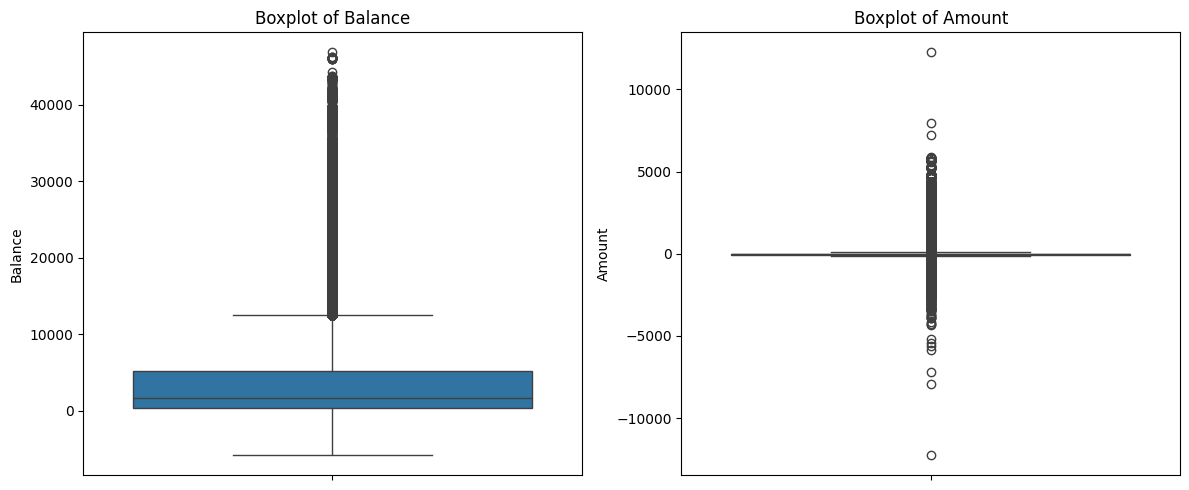

In [117]:
# Detect outliers using box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Balance'])
plt.title('Boxplot of Balance')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Amount'])
plt.title('Boxplot of Amount')

plt.tight_layout()
plt.show()

In [118]:
# Correlation before imputation
correlation_before = data[['Balance', 'Amount']].corr()

# Correlation after imputation
correlation_after = data[['Balance', 'Amount']].corr()

print("Correlation Matrix Before Imputation:\n", correlation_before)
print("\nCorrelation Matrix After Imputation:\n", correlation_after)

Correlation Matrix Before Imputation:
           Balance    Amount
Balance  1.000000  0.077546
Amount   0.077546  1.000000

Correlation Matrix After Imputation:
           Balance    Amount
Balance  1.000000  0.077546
Amount   0.077546  1.000000


In [119]:
# nearest integer/ rounding
data['Balance'] = data['Balance'].round().astype(int)
data['Amount'] = data['Amount'].round().astype(int)

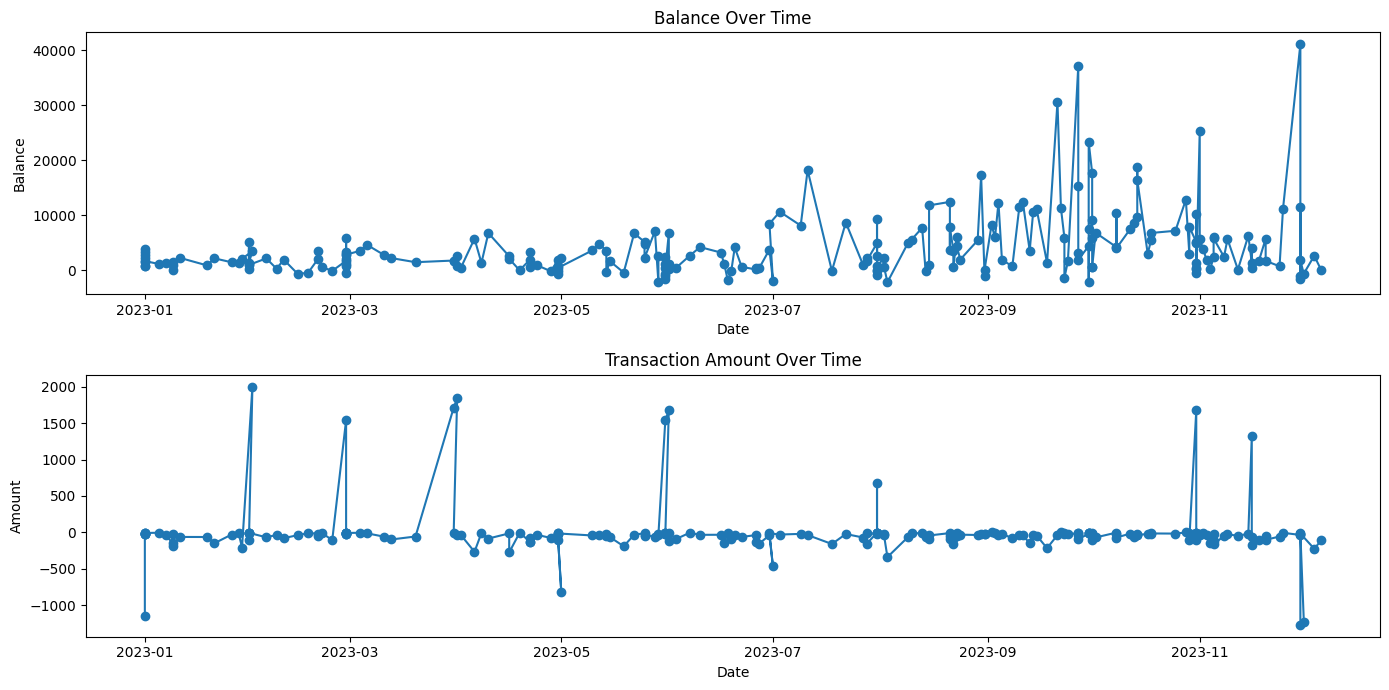

In [120]:
# Plot to visualize imputation effects

# specific account to visualize
sample_account = data[data['Account No'] == 999752673]  # random account_number 

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(sample_account['Date'], sample_account['Balance'], marker='o', linestyle='-')
plt.title('Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')

plt.subplot(2, 1, 2)
plt.plot(sample_account['Date'], sample_account['Amount'], marker='o', linestyle='-')
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

## In amount we are having positive and negative values as debit and credit.

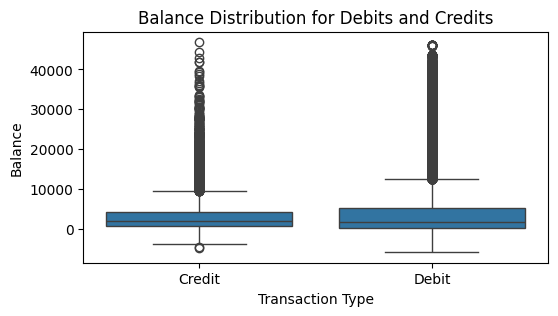

In [121]:
# Label the transactions as debit or credit
data['Transaction Type'] = ['Credit' if amt > 0 else 'Debit' for amt in data['Amount']]

# Plotting the distribution of Balances for debits and credits
plt.figure(figsize=(6,3))
sns.boxplot(x='Transaction Type', y='Balance', data=data)
plt.title('Balance Distribution for Debits and Credits')
plt.xlabel('Transaction Type')
plt.ylabel('Balance')
plt.show()

In [122]:
# Count the number of negative amounts (Debits)
negative_values = (data['Amount'] < 0).sum()
print(f"Count of negative values (Debits): {negative_values}")
positive_values = (data['Amount'] > 0).sum()
print(f"Count of positive values (Credits): {positive_values}")

Count of negative values (Debits): 219266
Count of positive values (Credits): 10419


- 219266 debit transactions and 10418 credit transactions

In [123]:
# Sum up the amounts for each account
account_balances = data.groupby('Account No')['Amount'].sum()

# Check if any account has a negative balance
accounts_with_negative_balance = account_balances[account_balances < 0]

if accounts_with_negative_balance.empty:
    print("No accounts have a negative balance.")
else:
    print("Accounts with negative balance:")
    print(accounts_with_negative_balance)

Accounts with negative balance:
Account No
101531259    -758
104832000   -4566
105375973   -1062
108812033    -672
111137699   -1684
             ... 
993663752   -1329
998390769   -1823
998405607   -2018
999752672    -768
999752673   -1322
Name: Amount, Length: 578, dtype: int32


In [124]:
accounts_with_negative_balance.nunique()

551

- 550 users are having negative balances

In [125]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

In [126]:
debit_stats, credit_stats

(count    219484.000000
 mean       3614.055463
 std        5413.180527
 min       -5790.983500
 25%         353.977270
 50%        1655.809208
 75%        5270.782486
 max       46184.158837
 Name: Balance, dtype: float64,
 count    10402.000000
 mean      3505.657746
 std       4583.327041
 min      -4678.910000
 25%        869.737557
 50%       2137.703000
 75%       4362.459068
 max      46804.158837
 Name: Balance, dtype: float64)

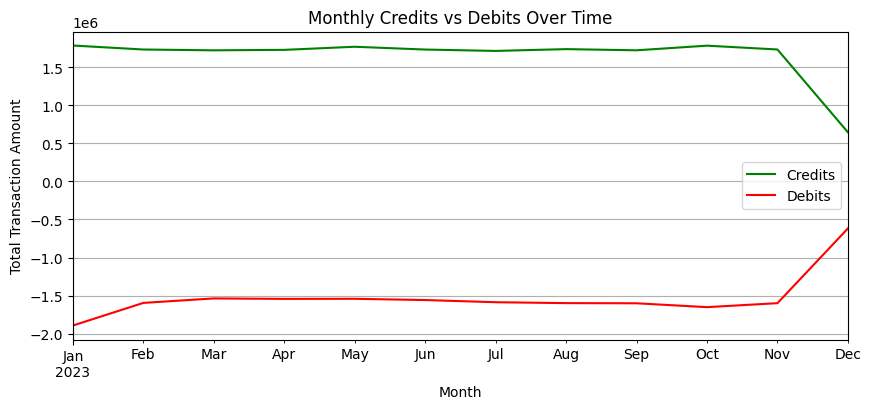

In [127]:
# Resample credits and debits on a monthly basis and calculate the sum of transaction amounts
monthly_credits = credits.resample('M', on='Date')['Amount'].sum()
monthly_debits = debits.resample('M', on='Date')['Amount'].sum()

# Plot the monthly transaction amounts for credits and debits
plt.figure(figsize=(10,4))
monthly_credits.plot(label='Credits', color='green')
monthly_debits.plot(label='Debits', color='red')
plt.title('Monthly Credits vs Debits Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

## Key Observations:

Volatility: The debits seem more volatile compared to credits, which could indicate varying spending habits or payment cycles.

Trends: There might be specific months where credits or debits peak, which could correspond to seasonal factors, tax periods, or other cyclical events affecting transaction volumes.

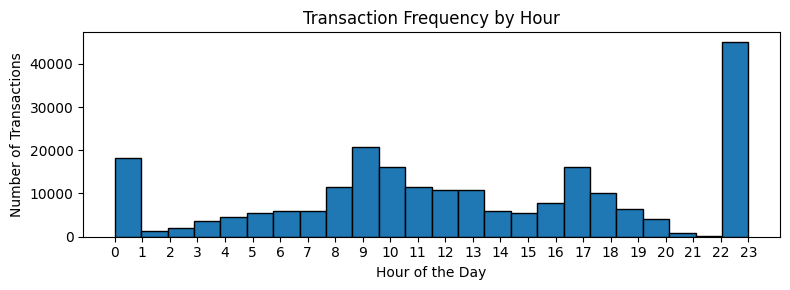

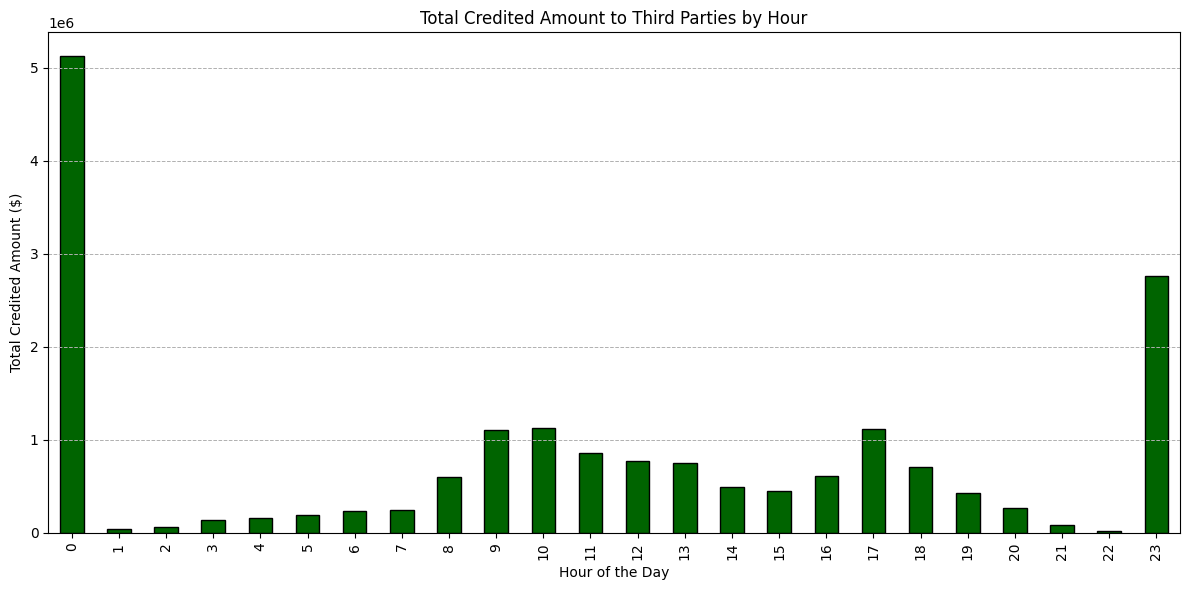

In [128]:

# Plot the transaction frequency by hour
plt.figure(figsize=(8, 3))
plt.hist(pd.to_datetime(data['Timestamp']).dt.hour, bins=24, edgecolor='black')
plt.title('Transaction Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Ensures ticks for every hour
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()

# Plot the total credited amount to third parties by hour
plt.figure(figsize=(12, 6))
data.loc[data['Amount'] < 0].groupby(pd.to_datetime(data['Timestamp']).dt.hour)['Amount'].apply(lambda x: abs(x).sum()).plot(
    kind='bar', color='darkgreen', edgecolor='black')
plt.title('Total Credited Amount to Third Parties by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Credited Amount ($)')
plt.xticks(range(24))  # Ensures ticks for every hour
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()

## First plot:
- transaction frequency by hour (activity at certain times of the day). 
- It appears that there's a peak in transactions towards the end of the day, around 23:00. 
## second plot:
- plot shows the total credited amount to third parties by hour.
- presents the absolute values of the negative amounts to reflect the spending positively.

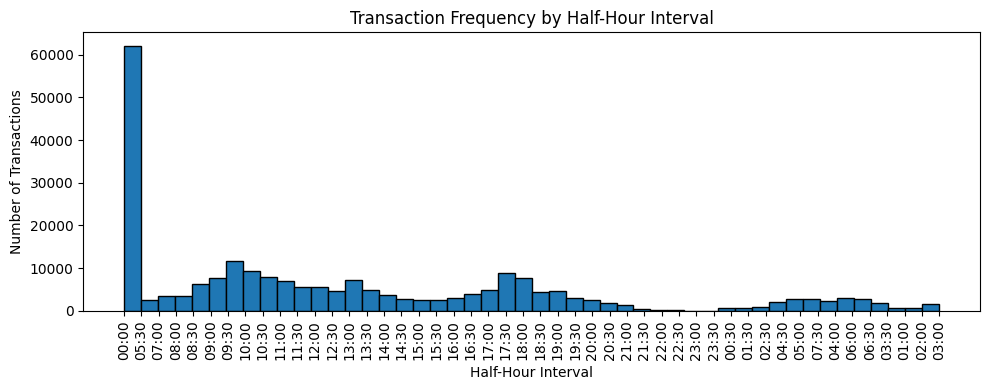

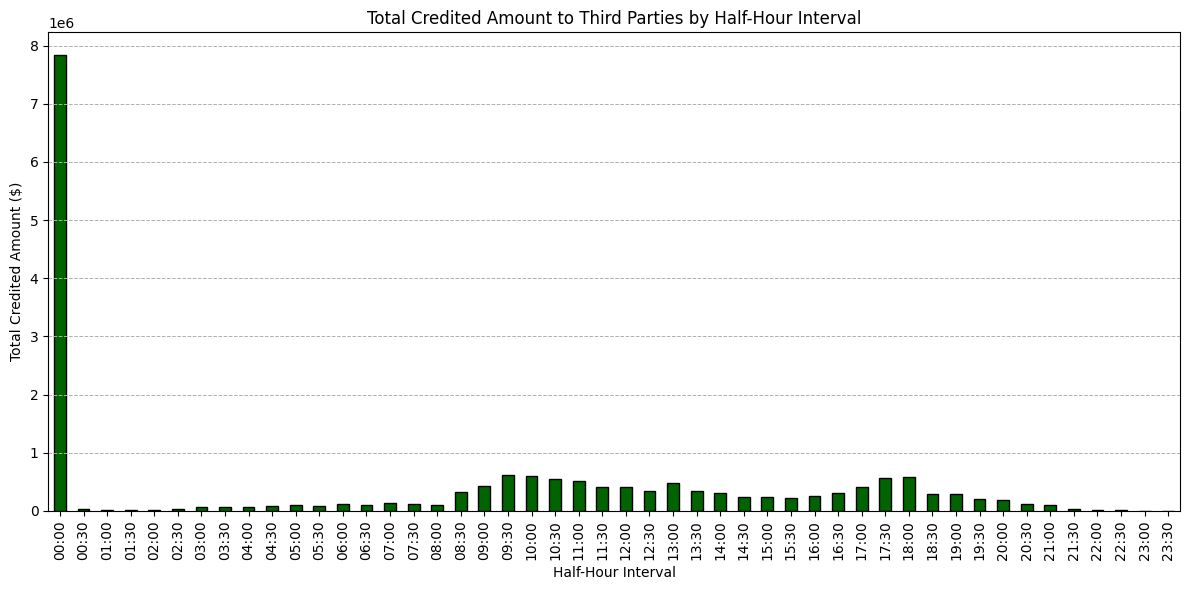

In [129]:

# Plot the transaction frequency by half-hour intervals
plt.figure(figsize=(10, 4))
plt.hist(pd.to_datetime(data['Timestamp']).dt.round('30min').dt.strftime('%H:%M'), bins=48, edgecolor='black')
plt.title('Transaction Frequency by Half-Hour Interval')
plt.xlabel('Half-Hour Interval')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the figure size
plt.show()

# Plot the total credited amount to third parties by half-hour intervals
plt.figure(figsize=(12, 6))
data.loc[data['Amount'] < 0].groupby(pd.to_datetime(data['Timestamp']).dt.round('30min').dt.strftime('%H:%M'))['Amount'].apply(lambda x: abs(x).sum()).plot(
    kind='bar', color='darkgreen', edgecolor='black')
plt.title('Total Credited Amount to Third Parties by Half-Hour Interval')
plt.xlabel('Half-Hour Interval')
plt.ylabel('Total Credited Amount ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()  
plt.show()


## Insights
Nighttime Transactions: Elevated levels of transaction activity during late hours could indicate fraudulent behavior, as these times are typically off-peak for regular consumer transactions.

Regular Business Hours Activity: While there is also activity during regular hours, the spikes during unusual hours warrant closer scrutiny.

## identifying the top spending users from the dataset and analyze where they are spending the most. This analysis will help you in your marketing analysis by targeting specific customers and promoting products accordingly.  

### identify the top spending users based on their transaction amounts.

In [130]:
# Group the data by Account No and calculate the total spending for each account (including debits)
total_spending_per_user = debits.groupby('Account No')['Amount'].sum().abs()

# Identify the top spending users
top_spending_users = total_spending_per_user.nlargest(10)  

# Print the top spending users
print("Top Spending Users:")
print(top_spending_users)

Top Spending Users:
Account No
450896297    50183.99
990461108    47214.94
134847904    43921.62
670427480    43902.06
930277104    43765.26
647936800    42743.53
639549973    42620.10
992204045    41772.52
285220959    41483.33
891716230    41227.93
Name: Amount, dtype: float64


Transaction Frequency of Top Spending Users:
Account No
134847904    226
285220959    234
450896297    439
639549973    371
647936800    319
670427480    180
891716230    224
930277104    362
990461108    234
992204045    370
dtype: int64


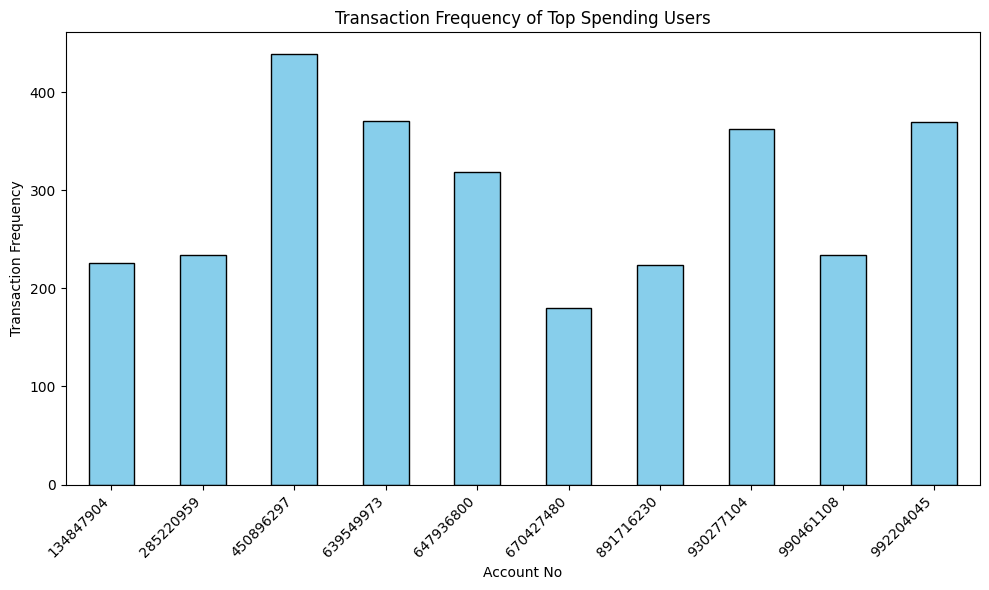

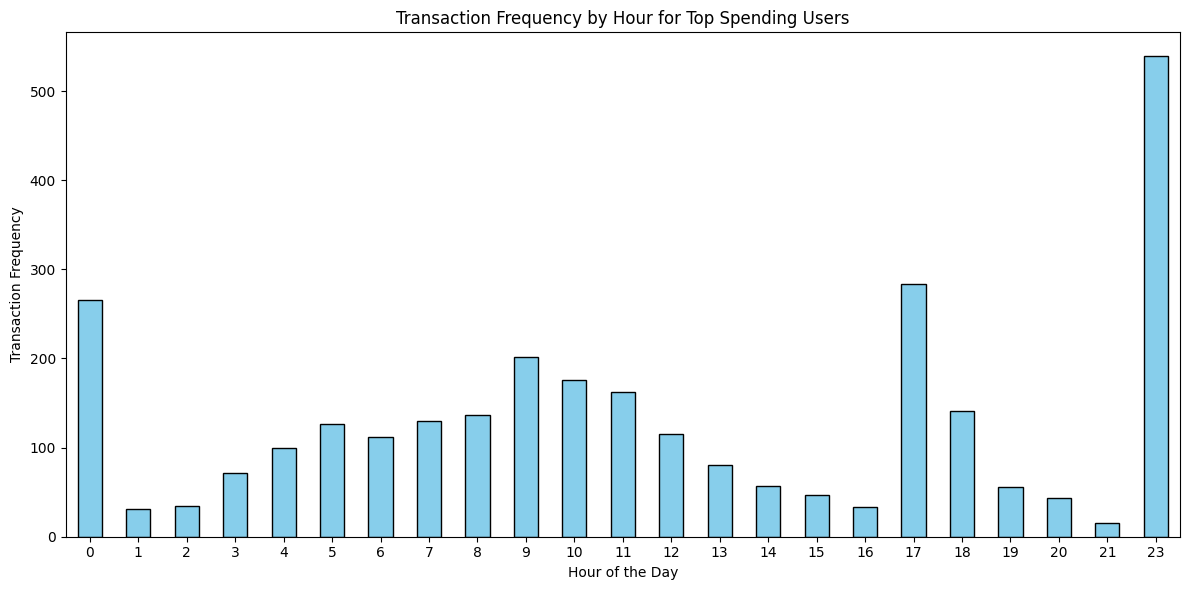

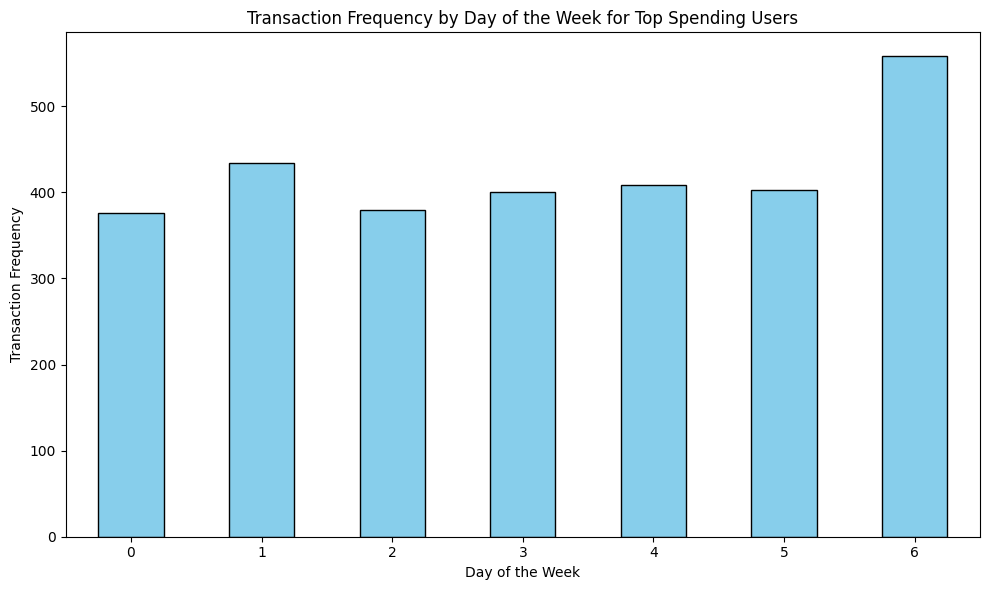

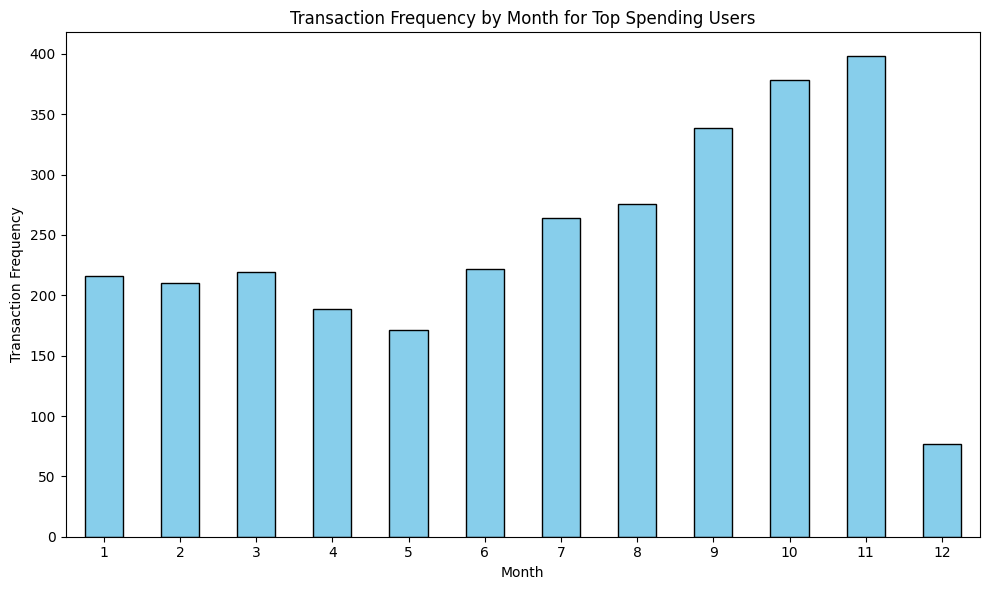

In [132]:

top_users_data = data[data['Account No'].isin(top_spending_users.index)]
transaction_frequency = top_users_data.groupby('Account No').size()

print("Transaction Frequency of Top Spending Users:")
print(transaction_frequency)

plt.figure(figsize=(10, 6))
transaction_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transaction Frequency of Top Spending Users')
plt.xlabel('Account No')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_users_data['Hour'] = pd.to_datetime(top_users_data['Timestamp']).dt.hour
top_users_data['DayOfWeek'] = pd.to_datetime(top_users_data['Date']).dt.dayofweek
top_users_data['Month'] = pd.to_datetime(top_users_data['Date']).dt.month

# Plot transaction frequency by hour
plt.figure(figsize=(12, 6))
top_users_data.groupby('Hour').size().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transaction Frequency by Hour for Top Spending Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot transaction frequency by day of the week
plt.figure(figsize=(10, 6))
top_users_data.groupby('DayOfWeek').size().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transaction Frequency by Day of the Week for Top Spending Users')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot transaction frequency by month
plt.figure(figsize=(10, 6))
top_users_data.groupby('Month').size().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transaction Frequency by Month for Top Spending Users')
plt.xlabel('Month')
plt.ylabel('Transaction Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


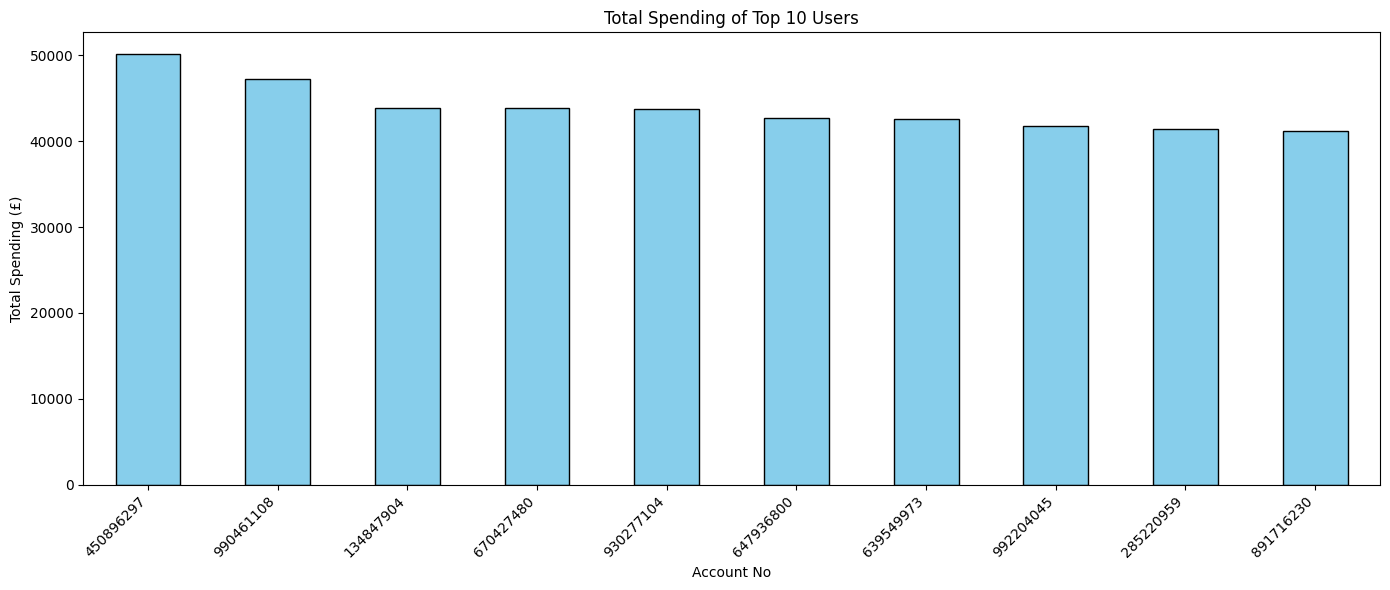

In [133]:
# Plot the total spending behaviors of the top spending users in one plot
plt.figure(figsize=(14, 6))
top_spending_users.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Spending of Top 10 Users')
plt.xlabel('Account No')
plt.ylabel('Total Spending (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Next steps:
- Product Recommendations: Analyze the types of products or services these top spending users are purchasing the most. This can be done by examining the transaction descriptions or categories if available.
- Personalized Offers: Create personalized offers or discounts on products that align with the spending patterns of these top users. For example, if they frequently purchase luxury items, offer exclusive discounts or loyalty rewards for high-end products.